In [1]:
# Import necessary Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop(columns="Unnamed: 0", axis=1, inplace=True)

# Removing Outliers Using IQR

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

In [7]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [8]:
data = df[(df >= lower_bound) & (df <= upper_bound) | df.isnull()]

In [9]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    2
Sales        0
dtype: int64

In [10]:
# fill the null values with it's mean
data['Newspaper']= data['Newspaper'].fillna(data['Newspaper'].mean())

# Explore Data

In [12]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
data.duplicated().any()

False

In [14]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [15]:
data.shape

(200, 4)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [17]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,29.777273,14.022500
std,85.854236,14.846809,20.343298,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,43.550000,17.400000
max,296.400000,49.600000,89.400000,27.000000


# Data Visualization

<Axes: >

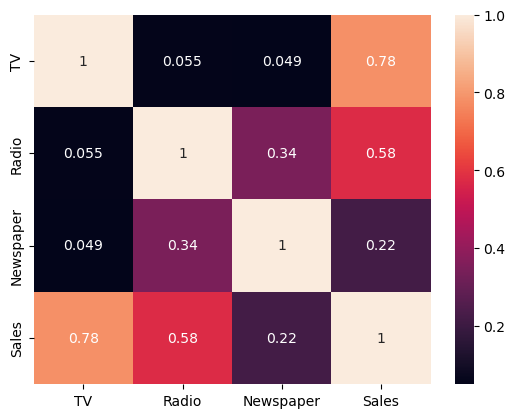

In [19]:
cor_mat = data[["TV", "Radio", "Newspaper", "Sales"]].corr()
sns.heatmap(cor_mat, annot=True)

<Axes: >

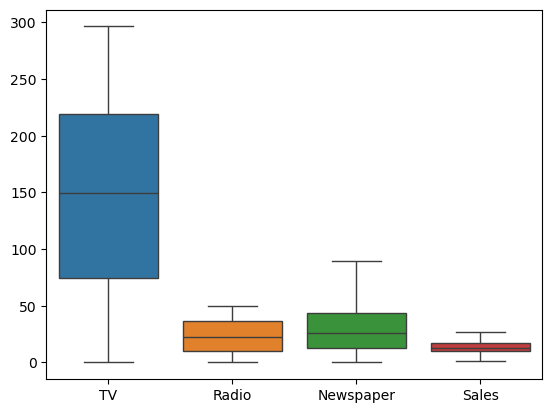

In [20]:
sns.boxplot(data=data)

<Axes: xlabel='Sales', ylabel='Count'>

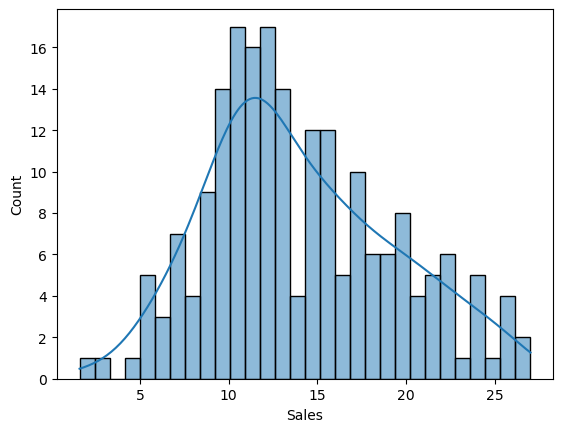

In [21]:
sns.histplot(data['Sales'], bins=30, kde=True)

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

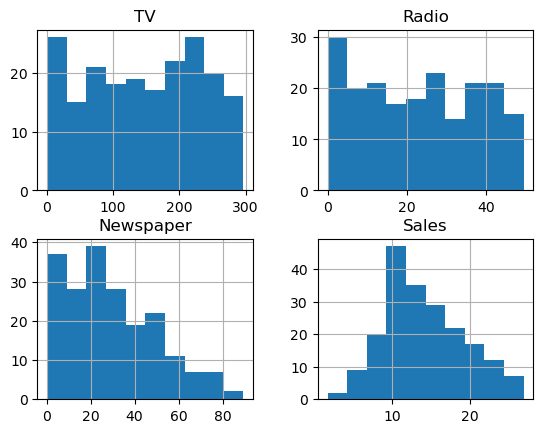

In [22]:
data.hist(bins=10)

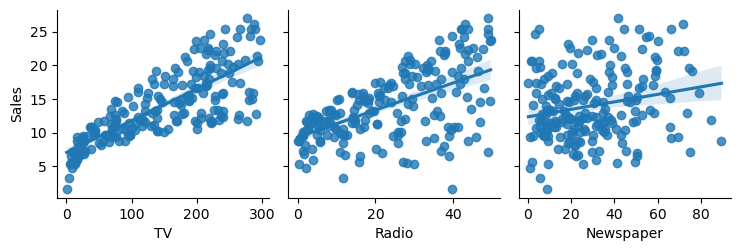

In [23]:
sns.pairplot(data, x_vars=["TV","Radio","Newspaper"], y_vars=["Sales"], kind="reg")

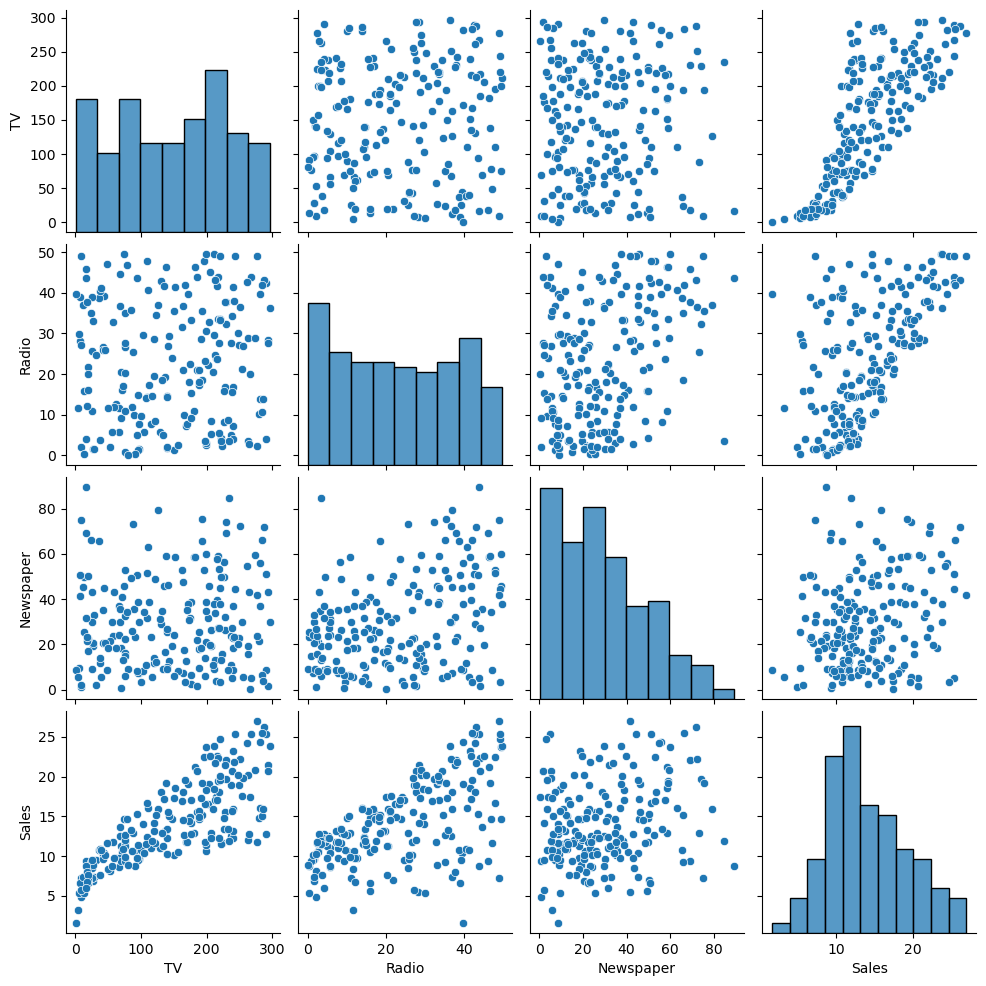

In [24]:
sns.pairplot(data)

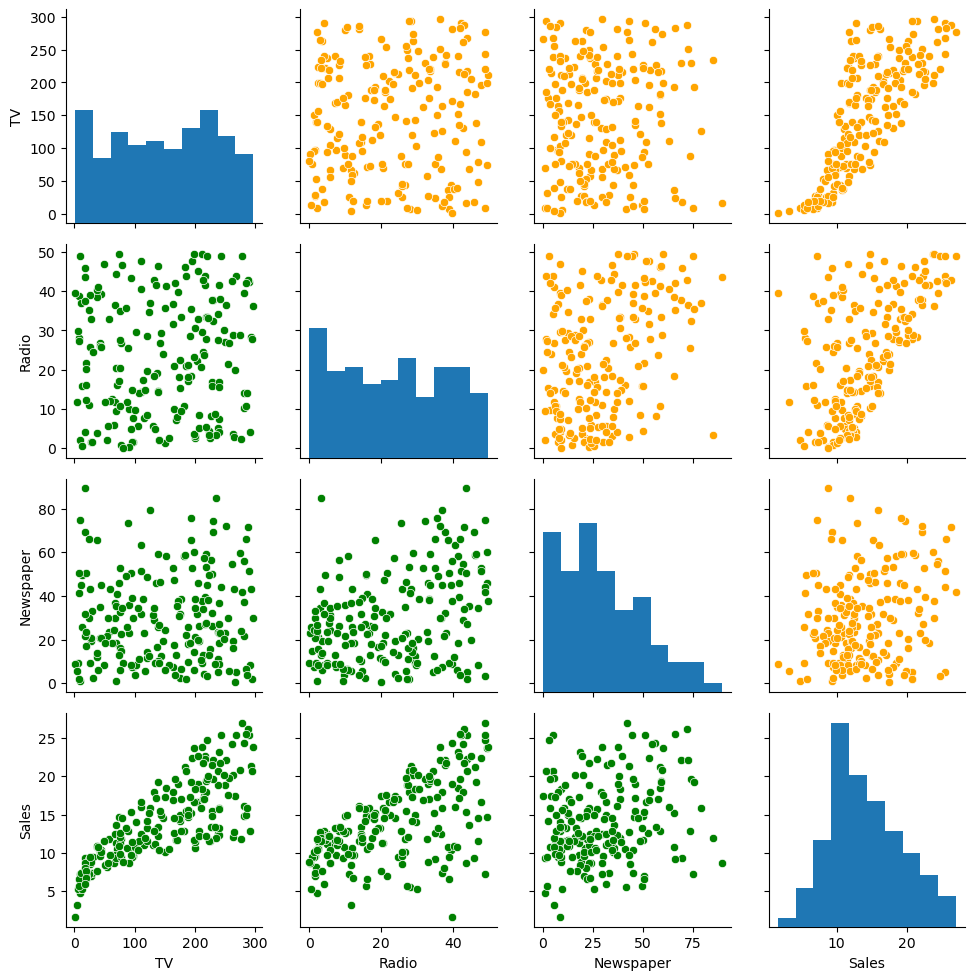

In [25]:
g = sns.PairGrid(data)
g.map_upper(sns.scatterplot,color='orange')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)

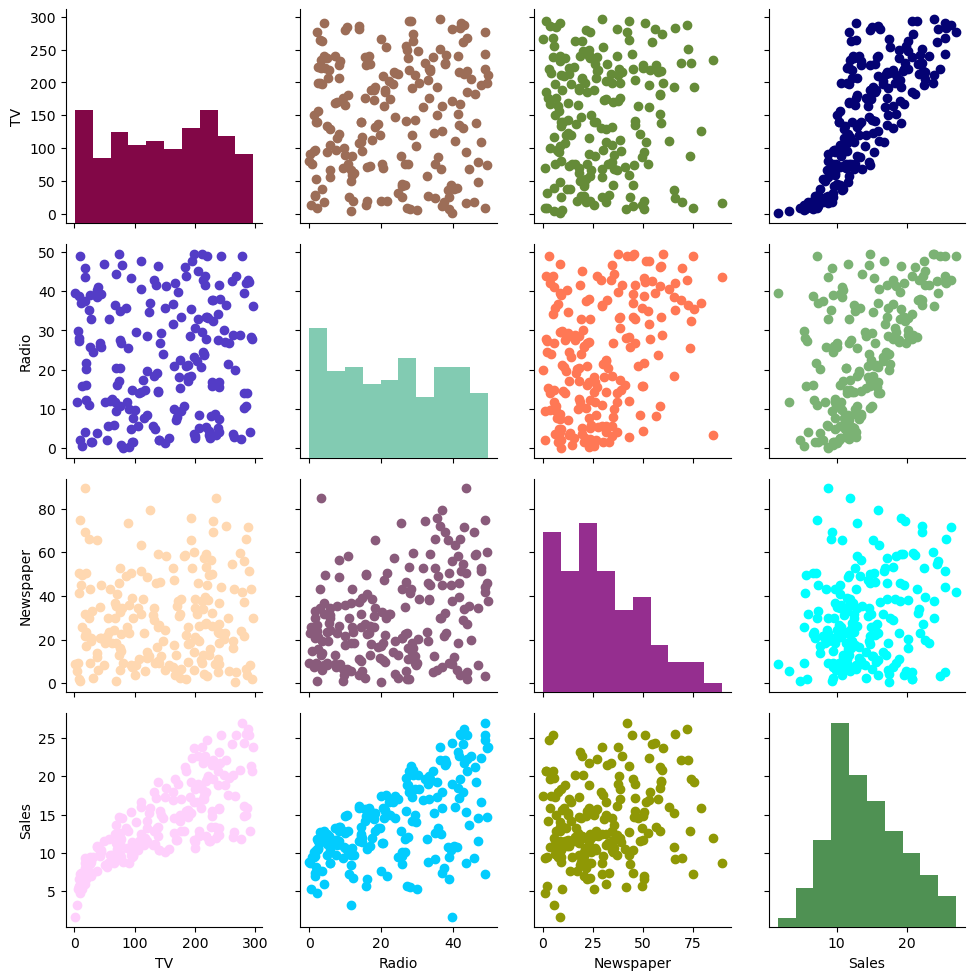

In [26]:
colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue'])

def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)

# df = sns.load_dataset("Advertising.csv")
g = sns.PairGrid(data)
g.map_diag(my_hist)
g.map_offdiag(my_scatter)

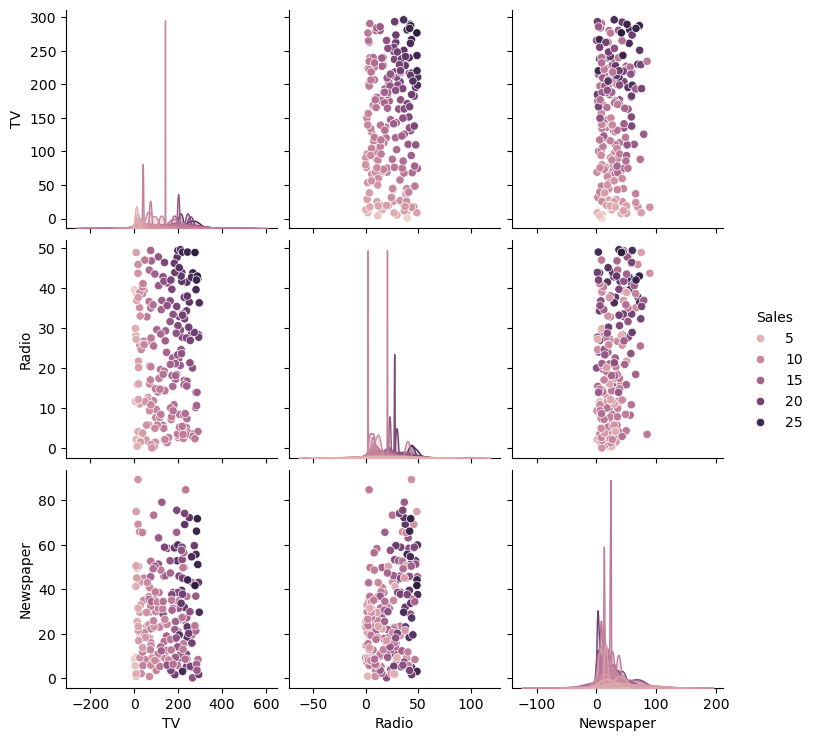

In [27]:
sns.pairplot(data = data , hue = 'Sales')

In [28]:
sc = StandardScaler()
col= ["TV","Radio","Newspaper"]
df[col]= sc.fit_transform(df[col])

X = data.drop('Sales', axis=1)
y = data[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#  1. Linear Regression 

In [30]:
# Fit the linear regression model using OLS
lr = sm.OLS.from_formula(formula="Sales ~ TV + Radio + Newspaper", data=data).fit()

# Coeffiecints
print(lr.params)

Intercept    2.942325
TV           0.045763
Radio        0.188556
Newspaper   -0.001194
dtype: float64


In [31]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           1.57e-96
Time:                        14:14:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9423      0.315      9.326      0.0

#  2. XGB Regressor

In [33]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train)
pred1= xgb.predict(X_test)

In [34]:
mean_absolute_error(y_test, pred1)

0.694978892803192

In [35]:
mean_squared_error(y_test, pred1)

0.6837441129974955

In [36]:
r2_score(y_test, pred1)

0.9783375708604951

In [37]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true) * 100)

mean_absolute_percentage_error(y_test, pred1)

54.402672523432095

#  3.  Gradient Boosting Regressor 

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
pred2 = gb.predict(X_test)

In [40]:
mean_absolute_error(y_test,pred2)

0.6082221525162692

In [41]:
mean_squared_error(y_test,pred2)

0.5207970176675948

In [42]:
r2_score(y_test,pred2)

0.9835000722100096

In [43]:
mean_absolute_percentage_error(y_test,pred2)

54.25460376192392

#  4. Random Forest Regressor 

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred3= rf.predict(X_test)

In [46]:
mean_absolute_error(y_test, pred3)

0.6175999999999993

In [47]:
mean_squared_error(y_test, pred3)

0.5860978499999991

In [48]:
r2_score(y_test,pred3)

0.9814312066413541

In [49]:
mean_absolute_percentage_error(y_test, pred3)

53.61662385837644

#  Best-Fit-Line

In [51]:
# sns.pairplot(data, x_vars=y_test, y_vars=([["pred1", "pred2", "pred3"]]), kind="reg")

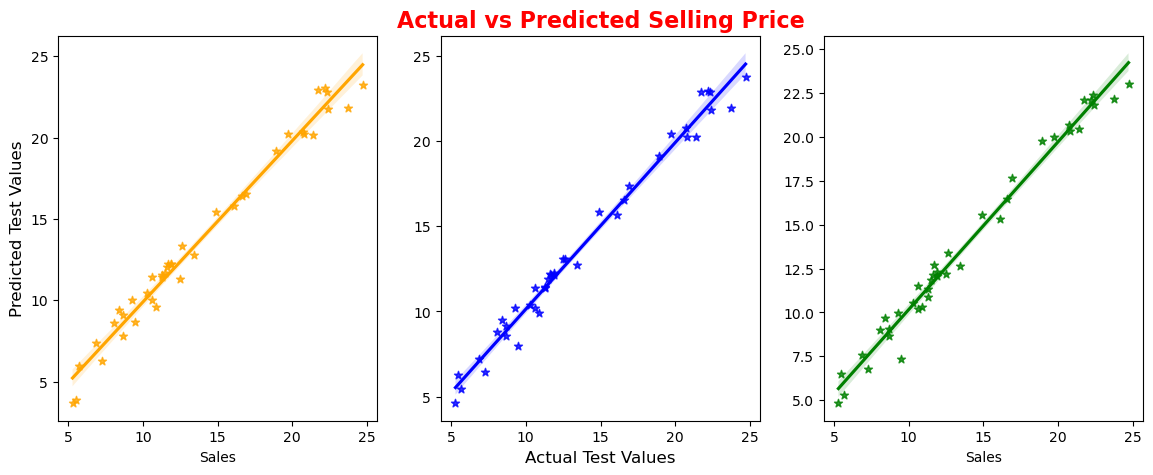

In [52]:
# Create a figure with three subplots side by side.
plt.figure(figsize=(14, 5))



#------------------- Subplot 1: XGB Regressor
plt.subplot(1, 3, 1)

# Set the title for the first subplot.
#plt.title("Actual vs Predicted Selling Price", fontsize=16)

# Create a reg plot to visualize The Actual vs Predicted Selling Price by XGB Regressor 
sns.regplot(x=y_test, y=pred1, color="orange",marker="*",label="best_fit_line")

# Set labels for the first subplot.
#plt.xlabel("Actual Test Values", fontsize=16)
plt.ylabel("Predicted Test Values", fontsize=12)



#------------------- Subplot 2: Gradient Boosting Regressor
plt.subplot(1, 3, 2)
plt.title("Actual vs Predicted Selling Price", fontsize=16, weight='bold').set_color('red')
sns.regplot(x=y_test, y=pred2, color="blue",marker="*",label="best_fit_line")
plt.xlabel("Actual Test Values", fontsize=12)
#plt.ylabel("Predicted Test Values", fontsize=16)



#------------------- Subplot 3: Elastic Net
plt.subplot(1, 3, 3)
#plt.title("Actual vs Predicted Selling Price", fontsize=16)
sns.regplot(x=y_test, y=pred3, color="green",marker="*",label="best_fit_line")
#plt.xlabel("Actual Test Values", fontsize=16)
#plt.ylabel("Predicted Test Values", fontsize=16)



# Display the subplots side by side.
plt.show()

#  Important Feature

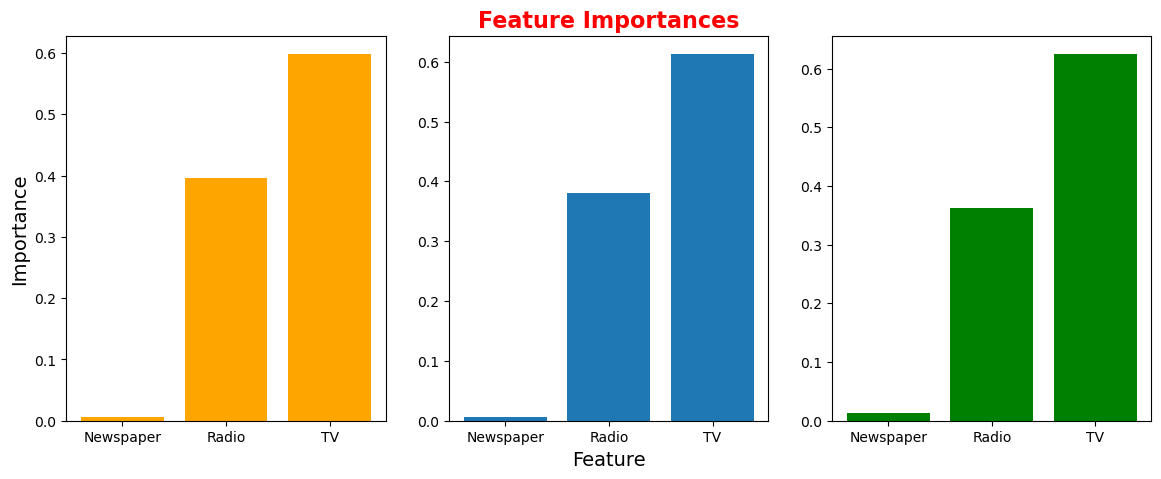

In [54]:
plt.figure(figsize=(14, 5))


#------------------- Subplot 1: XGB Regressor
plt.subplot(1, 3, 1)

importances = xgb.feature_importances_
feature_names = X.columns 
sorted_indices = np.argsort(importances)
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center',color="orange")
plt.xticks(range(len(feature_names)), feature_names[sorted_indices])
#plt.xlabel('Feature')
plt.ylabel('Importance', fontsize=14)
#plt.title('Feature Importances')


#------------------- Subplot 2: Gradient Boosting Regressor
plt.subplot(1, 3, 2)

importances = gb.feature_importances_
feature_names = X.columns 
sorted_indices = np.argsort(importances)
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[sorted_indices])
plt.xlabel('Feature', fontsize=14)
#plt.ylabel('Importance')
plt.title('Feature Importances', fontsize=16, weight='bold', color='red')


#------------------- Subplot 3: Elastic Net
plt.subplot(1, 3, 3)

importances = rf.feature_importances_
feature_names = X.columns 
sorted_indices = np.argsort(importances)
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center',color="green")
plt.xticks(range(len(feature_names)), feature_names[sorted_indices])
#plt.xlabel('Feature')
#plt.ylabel('Importance')
#plt.title('Feature Importances')


plt.show()

#  Comparison of R-squared (R2) Scores 

In [56]:
final_data= pd.DataFrame({'Models' : ['XGBoost', 'Gradient Boosting', 'Random Forest' ],
                          'R2_score' : [r2_score(y_test, pred1)*100, 
                                        r2_score(y_test, pred2)*100, 
                                        r2_score(y_test, pred3)*100]
                         })

In [57]:
final_data = final_data.sort_values(by=['R2_score'], ascending=False)
final_data

,Models,R2_score
1,Gradient Boosting,98.350007
2,Random Forest,98.143121
0,XGBoost,97.833757


<Axes: xlabel='Models', ylabel='R2_score'>

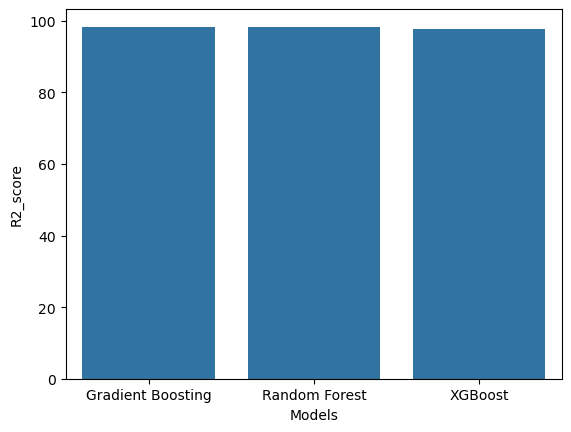

In [58]:
sns.barplot(x= final_data['Models'], y= final_data['R2_score'])

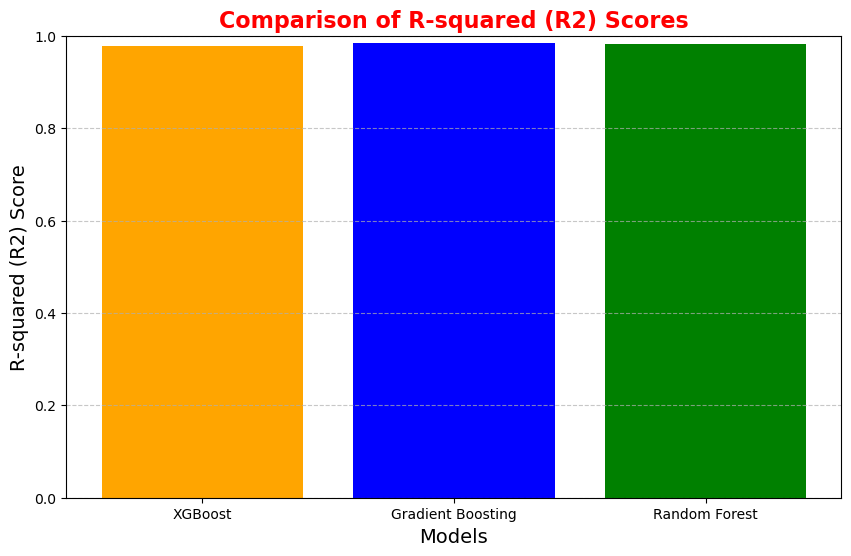

In [59]:
r2_scores = [r2_score(y_test, pred1), r2_score(y_test, pred2), r2_score(y_test, pred3)]
models = ['XGBoost', 'Gradient Boosting', 'Random Forest']

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['orange','blue','green'])

plt.title(label ='Comparison of R-squared (R2) Scores', fontsize=16, weight='bold', color='red')
plt.xlabel('Models', fontsize=14)
plt.ylabel('R-squared (R2) Score', fontsize=14)

plt.ylim(0, 1)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Save the Best Model

In [61]:
X_res= sc.fit_transform(X)
gb.fit(X, y)

GradientBoostingRegressor(random_state=42)

In [62]:
import joblib
joblib.dump(gb,'sales_prediction')
model = joblib.load('sales_prediction')

In [63]:
import pickle
pickle.dump(gb,open('sales_prediction.pkl','wb'))

# Model Evaluation

In [65]:
# Input from given dataset (see index no. 197)
x_given = np.array([[177, 9.3, 6.4]])  
y_prediction = gb.predict(x_given)

print("Sales:", y_prediction)

Sales: [12.56479552]


In [66]:
# Custom input --> not in dataset
x_custom = np.array([[190, 10, 50]])  
y_prediction1 = gb.predict(x_custom)

print("Sales:", y_prediction1)

Sales: [13.18539836]


# Implement in web app

In [68]:
import subprocess
import os
#pip install pyngrok
from pyngrok import ngrok

In [69]:
#setup ngrok with authtoken
ngrok.set_auth_token("2jw2qqtRHsF6XTTVn5xT6fGHHbS_7q4BDgUWnf4PLX1RGrMcK")

#running flask app
os.system("nohup python -m flask run --no-reload &")

#opening ngrok tunnel to the flask app uding http protocol
proc = subprocess.Popen(["ngrok", "http", "5000"])

#Retrive ngrok's public url here
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

/opt/miniconda3/bin/python: No module named flask


Public URL: NgrokTunnel: "https://d539-2409-40e0-103f-8e98-b014-196-239d-89f1.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
from flask import Flask, request, jsonify
from IPython.display import display, HTML

# Load the trained model
model = joblib.load('sales_prediction.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    # HTML form to take inputs
    html_form = """
    <!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sales Prediction</title>
    <style>
        body {
            background-color: black;
            color: white;
            font-family: Arial, sans-serif;
            text-align: center;
            padding: 20px;
        }
        #predictionForm {
            display: inline-block;
            text-align: left;
        }
        img {
            max-width: 100%;
            height: auto;
        }
    </style>
</head>
<body>
    <h2>Sales Prediction</h2>
    <form id="predictionForm" method="post" action="/predict">
        <label for="TV">TV:</label>
        <input type="text" id="TV" name="TV"><br><br>

        <label for="Radio">Radio:</label>
        <input type="text" id="Radio" name="Radio"><br><br>

        <label for="Newspaper">Newspaper:</label>
        <input type="text" id="Newspaper" name="Newspaper"><br><br>


        <button type="button" onclick="predictSales()">Predict</button>
    </form>

    <p id="predictionResult"></p>

    <img src="https://crmech.com/wp-content/uploads/2022/03/Sales-forecast.png" alt="Credit Card Image">

    <script>
        function predictSales() {
            var xhr = new XMLHttpRequest();
            var url = "/predict";
            var data = new FormData(document.getElementById("predictionForm")); // Changed to FormData

            xhr.open("POST", url, true);
            xhr.onreadystatechange = function () {
                if (xhr.readyState === 4 && xhr.status === 200) {
                    var response = JSON.parse(xhr.responseText);
                    document.getElementById("predictionResult").innerHTML = "Sales Prediction: " + response.prediction;
                }
            };
            xhr.send(data);
        }
    </script>
</body>
</html>

    """
    return html_form

@app.route('/predict', methods=['POST'])
def predict():
    # Access form data
    TV = request.form['TV']
    Radio = request.form['Radio']
    Newspaper = request.form['Newspaper']

    # Convert data to appropriate types
    TV = float(TV)
    Radio = float(Radio)
    Newspaper = float(Newspaper)

    # Make prediction
    features = [[TV, Radio, Newspaper]]
    prediction = model.predict(features)

    return jsonify({'prediction': float(prediction)})

def run_flask_app():
    # Run Flask app on port 5000
    app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

# Start ngrok tunnel
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

# Display ngrok tunnel URL
display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
    # Keep the Flask app running
    run_flask_app()
except KeyboardInterrupt:
    # Shutdown ngrok and Flask app
    ngrok.kill()


Public URL: NgrokTunnel: "https://d5b3-2409-40e0-103f-8e98-b014-196-239d-89f1.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [02/Aug/2024 14:16:19] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Aug/2024 14:16:33] "POST /predict HTTP/1.1" 200 -
